## 抓取半導體業EPS 資訊

In [2]:
import requests
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb19'
payload = {
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code':'24',
    'year':'105',
    'season':'01'
}
res = requests.post(url , data = payload)

In [7]:
res.encoding = 'utf-8'
#res.text

## 使用Pandas 讀取表格資料

In [22]:
import pandas
dfs = pandas.read_html(res.text, header=0)

In [23]:
type(dfs)

list

In [24]:
len(dfs)

1

In [25]:
stockdf = dfs[0]

In [26]:
type(stockdf)

pandas.core.frame.DataFrame

In [27]:
stockdf.columns

Index(['公司代號', '公司名稱', '產業別', '基本每股盈餘(元)', '普通股每股面額', '營業收入', '營業利益',
       '營業外收入及支出', '稅後淨利'],
      dtype='object')

In [35]:
# contains 檢查理面有沒有包含特定文字
stockdf['公司代號'].str.contains('基本').head()

0    False
1     True
2    False
3    False
4    False
Name: 公司代號, dtype: bool

## 使用正規表達法篩選資料

In [76]:
# match 可以允許你使用正規表達法檢查
#stockdf['公司代號'].str.match('^[0-9]')
stockdf = stockdf[stockdf['公司代號'].str.match('^[0-9]')]
stockdf.head(3)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
0,6415,矽力杰股份有限公司,半導體業,3.09,新台幣 10.0000元,1317347.0,234500.0,14642.0,238548.0
2,2454,聯發科技股份有限公司,半導體業,2.79,新台幣 10.0000元,55905486.0,4403092.0,875095.0,4472987.0
3,2330,台灣積體電路製造股份有限公司,半導體業,2.50,新台幣 10.0000元,203495361.0,70467314.0,1788585.0,64792597.0


## 抓取所有上市公司EPS 資訊

In [1]:
import requests
import pandas
url = 'http://mops.twse.com.tw/mops/web/ajax_t163sb19'
payload = {
    'encodeURIComponent':'1',
    'step':'1',
    'firstin':'1',
    'TYPEK':'sii',
    'code':'',
    'year':'105',
    'season':'01'
}
res = requests.post(url , data = payload)
res.encoding = 'utf-8'
dfs = pandas.read_html(res.text, header=0)

In [2]:
len(dfs)

28

In [6]:
dfall = []
for df in dfs:
    df = df[df['公司代號'].str.match('^[0-9]')]
    dfall.append(df)

In [7]:
len(dfall)

28

In [8]:
stockdf = pandas.concat(dfall, ignore_index=True)

## 使用Pandas 做分析

In [9]:
stockdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 9 columns):
公司代號         888 non-null object
公司名稱         888 non-null object
產業別          888 non-null object
基本每股盈餘(元)    888 non-null float64
普通股每股面額      888 non-null object
營業收入         888 non-null float64
營業利益         888 non-null object
營業外收入及支出     888 non-null object
稅後淨利         888 non-null float64
dtypes: float64(3), object(6)
memory usage: 62.5+ KB


In [111]:
stockdf.describe()

,基本每股盈餘(元),營業收入,稅後淨利
count,888.000000,8.880000e+02,8.880000e+02
mean,0.512703,7.343384e+06,3.902492e+05
std,1.245745,3.770393e+07,2.623865e+06
min,-3.170000,4.900000e+01,-8.581508e+06
25%,0.020000,5.011640e+05,4.496000e+03
50%,0.270000,1.225597e+06,6.074100e+04
75%,0.802500,3.612438e+06,2.072038e+05
max,27.010000,9.580092e+08,6.479260e+07


In [112]:
stockdf['營業收入'].max()

958009217.0

In [113]:
#stockdf['營業收入'] == stockdf['營業收入'].max()
stockdf[stockdf['營業收入'] == stockdf['營業收入'].max()]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
857,2317,鴻海精密工業股份有限公司,其他電子業,1.76,新台幣 10.0000元,958009217.0,3.53247e+07,981284,27548860.0


In [114]:
stockdf[stockdf['營業收入'] == stockdf['營業收入'].min()]

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
262,1438,裕豐國際開發股份有限公司,建材營造,-0.01,新台幣 10.0000元,49.0,-2243,821,-1422.0


In [115]:
# SELECT * FROM stcodf ORDER BY 營業收入 LIMIT 3
stockdf.sort_values('營業收入').head(3)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
262,1438,裕豐國際開發股份有限公司,建材營造,-0.01,新台幣 10.0000元,49.0,-2243,821,-1422.0
269,2528,皇普建設股份有限公司,建材營造,-0.08,新台幣 10.0000元,66.0,-8311,-1947,-10258.0
608,2424,隴華電子股份有限公司,電腦及週邊設備業,-0.42,新台幣 10.0000元,1543.0,-5467,-8086,-12628.0


In [117]:
# SELECT * FROM stcodf ORDER BY 營業收入 DESC LIMIT 3
stockdf.sort_values('營業收入', ascending=False).head(10)

,公司代號,公司名稱,產業別,基本每股盈餘(元),普通股每股面額,營業收入,營業利益,營業外收入及支出,稅後淨利
857,2317,鴻海精密工業股份有限公司,其他電子業,1.76,新台幣 10.0000元,958009217.0,3.53247e+07,981284,27548860.0
562,4938,和碩聯合科技股份有限公司,電腦及週邊設備業,1.58,新台幣 10.0000元,256382310.0,6.77579e+06,-274616,4841286.0
484,2330,台灣積體電路製造股份有限公司,半導體業,2.50,新台幣 10.0000元,203495361.0,7.04673e+07,1.78858e+06,64792597.0
568,2382,廣達電腦股份有限公司,電腦及週邊設備業,0.94,新台幣 10.0000元,197362829.0,3.51397e+06,818882,3645190.0
578,2324,仁寶電腦工業股份有限公司,電腦及週邊設備業,0.37,新台幣 10.0000元,176649808.0,2.77641e+06,-477627,1746263.0
586,3231,緯創資通股份有限公司,電腦及週邊設備業,0.16,新台幣 10.0000元,134695622.0,1.52827e+06,-925379,397429.0
474,6505,台塑石化股份有限公司,油電燃氣業,1.10,新台幣 10.0000元,124471678.0,1.23492e+07,173801,10447660.0
825,3702,大聯大投資控股股份有限公司,電子通路業,0.94,新台幣 10.0000元,121532749.0,2.09542e+06,-192901,1560371.0
318,2882,國泰金融控股股份有限公司,金融保險業,0.65,新台幣 10.0000元,120302943.0,--,--,8337866.0
555,2357,華碩電腦股份有限公司,電腦及週邊設備業,5.60,新台幣 10.0000元,119253004.0,5.03538e+06,376574,4234990.0


In [122]:
# SELECT 產業別, SUM('營業收入') FROM stockdf GROUP BY '產業別'
stockdf.groupby('產業別')['營業收入'].sum().sort_values(ascending=False)

產業別
電腦及週邊設備業    1.258632e+09
其他電子業       1.067066e+09
金融保險業       5.887326e+08
半導體業        5.245071e+08
電子通路業       3.280177e+08
光電業         3.100052e+08
電子零組件業      2.882352e+08
塑膠工業        2.491992e+08
通信網路業       2.201759e+08
其他          1.925858e+08
航運業         1.764076e+08
食品工業        1.646163e+08
貿易百貨        1.560951e+08
鋼鐵工業        1.438673e+08
油電燃氣業       1.347268e+08
紡織纖維        1.216846e+08
電機機械        1.055176e+08
汽車工業        1.027299e+08
建材營造        6.800162e+07
化學工業        6.420342e+07
電器電纜        5.689345e+07
橡膠工業        5.544802e+07
造紙工業        3.833490e+07
水泥工業        3.466540e+07
生技醫療業       2.434520e+07
觀光事業        2.178487e+07
玻璃陶瓷        1.302729e+07
資訊服務業       1.141810e+07
Name: 營業收入, dtype: float64

## 使用Pandas 繪圖

Populating the interactive namespace from numpy and matplotlib


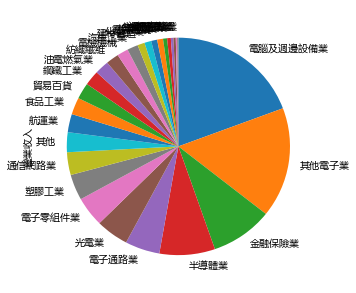

In [13]:
revenue_sum = stockdf.groupby('產業別')['營業收入'].sum().sort_values(ascending=False)
% pylab inline

revenue_sum.plot(kind = 'pie', figsize=[5,5], startangle = 90, counterclock = False)


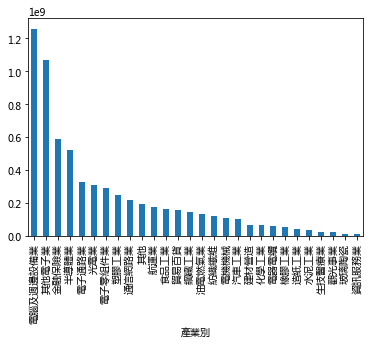

In [14]:
revenue_sum.plot(kind = 'bar')


## 正規表達法

In [41]:
a = '0912345678'
b = '0922333444'
c = '0955-111-222'
d = '0955-111333'

In [42]:
a == '0912345678'

True

In [50]:
import re
a = '3'
re.search('3' , a )
re.search('4' , a ) # match nothing
re.search('[0123456789]', a) # match 0 or 1 or 2 or 3 or 4 or 5 or 6 or ... or 9
re.search('[0-9]', a) # [0-9] == [0123456789]
re.search('\d', a) # \d == [0-9] == [0123456789]

<_sre.SRE_Match object; span=(0, 1), match='3'>

In [54]:
a = 'q'
re.search('[abcdefghijklmnopqrstuvwxyz]', a) # a or b or c or ... z
re.search('[a-z]', a) # [a-z] == [abcdefghijklmnopqrstuvwxyz]
a = 'Q'
re.search('[a-z]', a) # match nothing
re.search('[a-zA-Z]', a) 
a = '5'
re.search('\w', a) # \w == [a-zA-Z0-9]

<_sre.SRE_Match object; span=(0, 1), match='5'>

In [61]:
a = 'apple'
re.search('\w{5}', a)  # match exact 5 character
re.search('\w{3,8}', a)  # match at least 3 character, at most 8 characters
re.search('\w{0,}', a) # match at least 0 character
re.search('\w*', a) # * == {0,}
re.search('\w{1,}', a) # match at least 1 character
re.search('\w+', a) # + == {1,}

<_sre.SRE_Match object; span=(0, 5), match='apple'>

In [70]:
phones = ['0912345678', '0922333444', '0955-111-222', '0955-111333', 'a1112222333', '1112222333b']

for phone in phones: 
    #m = re.search('\d{10}', phone)
    #m = re.search('\d{4}-\d{3}-\d{3}', phone)
    #m = re.search('\d{4}-{0,1}\d{3}-{0,1}\d{3}', phone)
    #m = re.search('\d{4}-?\d{3}-?\d{3}', phone) # ? == {0,1}
    #m = re.search('^\d{4}-?\d{3}-?\d{3}', phone) # ^ match begin
    m = re.search('^\d{4}-?\d{3}-?\d{3}$', phone) # $ match end
    print(m)

<_sre.SRE_Match object; span=(0, 10), match='0912345678'>
<_sre.SRE_Match object; span=(0, 10), match='0922333444'>
<_sre.SRE_Match object; span=(0, 12), match='0955-111-222'>
<_sre.SRE_Match object; span=(0, 11), match='0955-111333'>
None
None
